In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import agreement
from statsmodels import stats

In [33]:
df = pd.read_csv("./eval-responses.csv")

In [3]:
df.columns = ['Timestamp', 'm5gru', 'm1lstm', 'm2lstm', 'm6gru', 'm5lstm', 'm4gru', 'm1gru', 'bukowski', 'm4lstm', 
              'm3lstm', 'piercy', 'm8gru', 'm8lstm', 'mcmorris', 'm3gru', 'm6lstm', 'm2gru', 'myles']

In [4]:
df

,Timestamp,m5gru,m1lstm,m2lstm,m6gru,m5lstm,m4gru,m1gru,bukowski,m4lstm,m3lstm,piercy,m8gru,m8lstm,mcmorris,m3gru,m6lstm,m2gru,myles
0,15/10/2021 16:59:57,Yes,No,Yes,Yes,Maybe,Maybe,No,No,Maybe,Yes,Maybe,Yes,Maybe,No,Yes,Maybe,Maybe,No
1,15/10/2021 17:01:34,Yes,No,No,Maybe,Maybe,Yes,No,Yes,Maybe,Maybe,Yes,No,Maybe,Yes,Maybe,Maybe,Maybe,Yes
2,15/10/2021 17:48:07,Yes,Maybe,No,Maybe,Maybe,Maybe,Maybe,Yes,Yes,Yes,Yes,Yes,Maybe,Yes,Yes,Yes,Maybe,Yes
3,15/10/2021 19:59:37,Yes,Maybe,Maybe,Maybe,Maybe,Yes,No,Yes,Yes,Maybe,Yes,Maybe,Yes,Yes,No,Yes,Maybe,Yes


In [5]:
no_time = df.drop(labels='Timestamp', axis=1)

In [6]:
no_time

,m5gru,m1lstm,m2lstm,m6gru,m5lstm,m4gru,m1gru,bukowski,m4lstm,m3lstm,piercy,m8gru,m8lstm,mcmorris,m3gru,m6lstm,m2gru,myles
0,Yes,No,Yes,Yes,Maybe,Maybe,No,No,Maybe,Yes,Maybe,Yes,Maybe,No,Yes,Maybe,Maybe,No
1,Yes,No,No,Maybe,Maybe,Yes,No,Yes,Maybe,Maybe,Yes,No,Maybe,Yes,Maybe,Maybe,Maybe,Yes
2,Yes,Maybe,No,Maybe,Maybe,Maybe,Maybe,Yes,Yes,Yes,Yes,Yes,Maybe,Yes,Yes,Yes,Maybe,Yes
3,Yes,Maybe,Maybe,Maybe,Maybe,Yes,No,Yes,Yes,Maybe,Yes,Maybe,Yes,Yes,No,Yes,Maybe,Yes


In [7]:
trydf = pd.DataFrame((no_time['m5gru'].value_counts(), no_time['m1lstm'].value_counts(), no_time['m2lstm'].value_counts(), no_time['m6gru'].value_counts(), 
                     no_time['m5lstm'].value_counts(), no_time['m4gru'].value_counts(), no_time['m1gru'].value_counts(), no_time['bukowski'].value_counts(), 
                      no_time['m4lstm'].value_counts(), no_time['m3lstm'].value_counts(), no_time['piercy'].value_counts(), no_time['m8gru'].value_counts(),
                    no_time['m8lstm'].value_counts(), no_time['mcmorris'].value_counts(), no_time['m3gru'].value_counts(), no_time['m6lstm'].value_counts(),
                     no_time['m2gru'].value_counts(), no_time['myles'].value_counts()))

In [8]:
trydf.fillna(0).plot.bar(stacked=True)

In [9]:
no_time

,m5gru,m1lstm,m2lstm,m6gru,m5lstm,m4gru,m1gru,bukowski,m4lstm,m3lstm,piercy,m8gru,m8lstm,mcmorris,m3gru,m6lstm,m2gru,myles
0,Yes,No,Yes,Yes,Maybe,Maybe,No,No,Maybe,Yes,Maybe,Yes,Maybe,No,Yes,Maybe,Maybe,No
1,Yes,No,No,Maybe,Maybe,Yes,No,Yes,Maybe,Maybe,Yes,No,Maybe,Yes,Maybe,Maybe,Maybe,Yes
2,Yes,Maybe,No,Maybe,Maybe,Maybe,Maybe,Yes,Yes,Yes,Yes,Yes,Maybe,Yes,Yes,Yes,Maybe,Yes
3,Yes,Maybe,Maybe,Maybe,Maybe,Yes,No,Yes,Yes,Maybe,Yes,Maybe,Yes,Yes,No,Yes,Maybe,Yes


In [10]:
trydf.sort_index().fillna(0)

,Yes,No,Maybe
bukowski,3.0,1.0,0.0
m1gru,0.0,3.0,1.0
m1lstm,0.0,2.0,2.0
m2gru,0.0,0.0,4.0
m2lstm,1.0,2.0,1.0
m3gru,2.0,1.0,1.0
m3lstm,2.0,0.0,2.0
m4gru,2.0,0.0,2.0
m4lstm,2.0,0.0,2.0
m5gru,4.0,0.0,0.0


In [11]:
crosstab = pd.crosstab(no_time.columns, no_time.values[0]) + pd.crosstab(no_time.columns, no_time.values[1]) + pd.crosstab(no_time.columns, no_time.values[2]) + pd.crosstab(no_time.columns, no_time.values[3])

In [12]:
crosstab.columns.name = ''
crosstab.index.name = ''

In [14]:
crosstab = crosstab.reindex([
    'bukowski',
    'mcmorris',
    'myles',
    'piercy',
    'm1gru',
    'm1lstm',
    'm2gru',
    'm2lstm',
    'm3gru',
    'm3lstm',
    'm4gru',
    'm4lstm',
    'm5gru',
    'm5lstm',
    'm6gru',
    'm6lstm',
    'm8gru',
    'm8lstm']) 

In [17]:
crosstab.index = ['Bukowski',
 'McMorris',
 'Myles',
 'Piercy',
 'm1gru',
 'm1lstm',
 'm2gru',
 'm2lstm',
 'm3gru',
 'm3lstm',
 'm4gru',
 'm4lstm',
 'm5gru',
 'm5lstm',
 'm6gru',
 'm6lstm',
 'm8gru',
 'm8lstm']

In [19]:
labels = crosstab.index.to_list()

maybe = crosstab['Maybe'].to_list()
no = crosstab['No'].to_list()
yes = crosstab['Yes'].to_list()


width = 0.5

In [20]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"]=10, 5

In [21]:
maybeno = np.array([maybe, no]).sum(0).tolist()

In [22]:
colours = ['#f7b64d',"#a17412","#4F5D18",
           "#a4af69","#70a0af","#28536b","#684756","#cd5d67"]

In [23]:
colours = ["#70a0af","#67723b","#f7b64d","#F1874E","#cd5d67","#765061"]

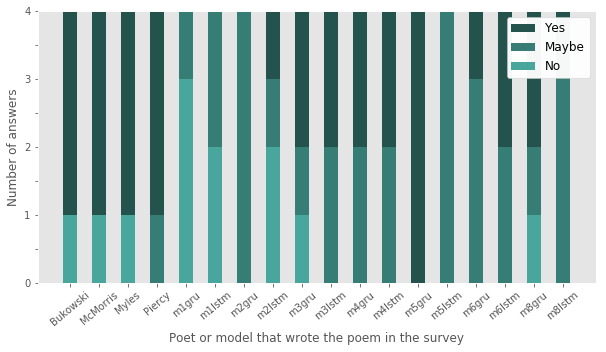

In [105]:
fig, ax = plt.subplots()

ax.bar(labels, yes, width, bottom=maybeno,
       label='Yes', color='#24534e')
ax.bar(labels, maybe, width, bottom=no,
       label='Maybe', color='#367d75'
      )
ax.bar(labels, no, width, 
       label='No', color='#48a69c')



ax.legend(loc=1, fontsize=12, frameon=True, facecolor="white", framealpha=10)
ylabels = [item.get_text() for item in ax.get_yticklabels()]
ylabels[0] = int(0)
ylabels[2] = int(1)
ylabels[4] = int(2)
ylabels[6] = int(3)
ylabels[8] = int(4)

ax.set_yticklabels(ylabels)
plt.xticks(rotation=40)
plt.xlabel("Poet or model that wrote the poem in the survey")
plt.ylabel("Number of answers")
plt.grid(False)
plt.savefig('./eval-plot.pdf', bbox_inches="tight")
#plt.show()

In [52]:
matrix = crosstab.to_numpy()

In [55]:
def fleiss_kappa(M):
    """Computes Fleiss' kappa for group of annotators.
    :param M: a matrix of shape (:attr:'N', :attr:'k') with 'N' = number of subjects and 'k' = the number of categories.
        'M[i, j]' represent the number of raters who assigned the 'i'th subject to the 'j'th category.
    :type: numpy matrix
    :rtype: float
    :return: Fleiss' kappa score
    """
    N, k = M.shape  # N is # of items, k is # of categories
    n_annotators = float(np.sum(M[0, :]))  # # of annotators
    tot_annotations = N * n_annotators  # the total # of annotations
    category_sum = np.sum(M, axis=0)  # the sum of each category over all items

    # chance agreement
    p = category_sum / tot_annotations  # the distribution of each category over all annotations
    PbarE = np.sum(p * p)  # average chance agreement over all categories

    # observed agreement
    P = (np.sum(M * M, axis=1) - n_annotators) / (n_annotators * (n_annotators - 1))
    Pbar = np.sum(P) / N  # add all observed agreement chances per item and divide by amount of items

    return round((Pbar - PbarE) / (1 - PbarE), 4)

In [56]:
fleiss_kappa(matrix)

0.1699

In [61]:
fleiss_kappa(matrix)

0.16985793699814694

In [65]:
no_time

,m5gru,m1lstm,m2lstm,m6gru,m5lstm,m4gru,m1gru,bukowski,m4lstm,m3lstm,piercy,m8gru,m8lstm,mcmorris,m3gru,m6lstm,m2gru,myles
0,Yes,No,Yes,Yes,Maybe,Maybe,No,No,Maybe,Yes,Maybe,Yes,Maybe,No,Yes,Maybe,Maybe,No
1,Yes,No,No,Maybe,Maybe,Yes,No,Yes,Maybe,Maybe,Yes,No,Maybe,Yes,Maybe,Maybe,Maybe,Yes
2,Yes,Maybe,No,Maybe,Maybe,Maybe,Maybe,Yes,Yes,Yes,Yes,Yes,Maybe,Yes,Yes,Yes,Maybe,Yes
3,Yes,Maybe,Maybe,Maybe,Maybe,Yes,No,Yes,Yes,Maybe,Yes,Maybe,Yes,Yes,No,Yes,Maybe,Yes


In [71]:
triples = []
for row in no_time.iterrows():
    coder = row[0]
    for item, label in row[1].iteritems():
        triple = (coder, item, label)
        triples.append(triple)

In [109]:
lstm_gru_triples = []
poet_triples = []
for t in triples:
    if 'lstm' in t[1] or 'gru' in t[1]:
        lstm_gru_triples.append(t)
    else:
        poet_triples.append(t)

In [114]:
crosstab[crosstab['Yes'] == 1]

,Maybe,No,Yes
m2lstm,1,2,1
m6gru,3,0,1
m8lstm,3,0,1


In [128]:
lstm_df = crosstab[crosstab.index.str.contains('lstm')]
gru_df = crosstab[crosstab.index.str.contains('gru')]


In [135]:
gru_yes = gru_df['Yes'].to_list()
sum(gru_yes)/len(gru_yes)

1.5714285714285714

In [136]:
gru_maybe = gru_df['Maybe'].to_list()
sum(gru_maybe)/len(gru_maybe)

1.7142857142857142

In [137]:
gru_no = gru_df['No'].to_list()
sum(gru_no)/len(gru_no)

0.7142857142857143

In [138]:
lstm_yes = lstm_df['Yes'].to_list()
sum(lstm_yes)/len(lstm_yes)

1.1428571428571428

In [139]:
lstm_maybe = lstm_df['Maybe'].to_list()
sum(lstm_maybe)/len(lstm_maybe)

2.2857142857142856

In [140]:
lstm_no = lstm_df['No'].to_list()
sum(lstm_no)/len(lstm_no)

0.5714285714285714

In [142]:
(sum(gru_yes) + sum(lstm_yes))/(len(gru_yes)+len(gru_no))

1.3571428571428572

In [118]:
ratingtask = agreement.AnnotationTask(data=triples)
print("kappa " +str(ratingtask.kappa()))
print("fleiss " + str(ratingtask.multi_kappa()))
print("alpha " +str(ratingtask.alpha()))
print("scotts " + str(ratingtask.pi()))

kappa 0.18223838572217055
fleiss 0.1778140293637847
alpha 0.1813876878731726
scotts 0.169857936998147


In [85]:
model_yes = crosstab[4:]['Yes'].to_list()
sum(model_yes)/len(model_yes)


1.3571428571428572

In [88]:
model_no = crosstab[4:]['No'].to_list()
sum(model_no)/len(model_no)


0.6428571428571429

In [143]:
model_maybe= crosstab[4:]['Maybe'].to_list()
sum(model_maybe)/len(model_maybe)


2.0

In [171]:
stats.inter_rater.fleiss_kappa(crosstab.to_numpy())

0.16985793699814694

In [189]:
notime_answers = no_time.sum(axis=1).to_list()

6

In [192]:
notime_answers[0].count('Yes'), notime_answers[1].count('Yes'), notime_answers[2].count('Yes'), notime_answers[3].count('Yes')

(6, 6, 10, 9)

In [193]:
notime_answers[0].count('No'), notime_answers[1].count('No'), notime_answers[2].count('No'), notime_answers[3].count('No')

(5, 4, 1, 2)

In [194]:
notime_answers[0].count('Maybe'), notime_answers[1].count('Maybe'), notime_answers[2].count('Maybe'), notime_answers[3].count('Maybe')

(7, 8, 7, 7)